___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1 style="text-align: center;">Deep Learning<br><br>Assignment-1 (ANN)<br><br>Churn Prediction for Bank Customer<br><h1>

# Dataset Info

We have a dataset in which there are details of a bank's customers and the target variable is a binary variable reflecting the fact whether the customer left the bank (closed his account) or he continues to be a customer.

The features in the given dataset are:
- **rownumber:** Row Numbers from 1 to 10000.
- **customerid:** A unique ID that identifies each customer.
- **surname:** The customer’s surname.
- **creditscore:** A credit score is a number between 300–850 that depicts a consumer's creditworthiness.
- **geography:** The country from which the customer belongs to.
- **Gender:** The customer’s gender: Male, Female
- **Age:** The customer’s current age, in years, at the time of being customer.
- **tenure:** The number of years for which the customer has been with the bank.
- **balance:** Bank balance of the customer.
- **numofproducts:** the number of bank products the customer is utilising.
- **hascrcard:** The number of credit cards given to the customer by the bank.
- **isactivemember:** Binary Flag for indicating if the client is active or not with the bank before the moment where the client exits the company (recorded in the variable "exited")
- **exited:** Binary flag 1 if the customer closed account with bank and 0 if the customer is retained.
We have a dataset in which there are details of a bank's customers and the target variable is a binary variable reflecting the fact whether the customer left the bank (closed his account) or he continues to be a customer.

Verilen veri kümesindeki özellikler:
- ** Rownumber: ** 1'den 10000'e satır numaraları.
- ** MüşteriD: ** Her müşteriyi tanımlayan benzersiz bir kimlik.
- ** Soyadı: ** Müşterinin soyadı.
- ** CreditsCore: ** Kredi puanı, bir tüketicinin kredibilitesini tasvir eden 300-850 arasında bir sayıdır.
- ** Coğrafya: ** Müşterinin ait olduğu ülke.
- ** Cinsiyet: ** Müşterinin Cinsiyeti: Erkek, Kadın
- ** Yaş: ** Müşterinin mevcut yaşı, yıllar içinde, müşteri olduğu zaman.
- ** Görev süresi: ** Müşterinin bankada bulunduğu yıl sayısı.
- ** Denge: ** Müşterinin banka bakiyesi.
- ** NumofProducts: ** Müşterinin kullandığı banka ürünlerinin sayısı.
- ** Hascrcard: ** Banka tarafından müşteriye verilen kredi kartı sayısı.
- ** Isactivemember: ** Müşterinin şirketten çıktığı andan önce bankada aktif olup olmadığını belirtmek için ikili bayrak ("Çıktı" değişkeninde kaydedildi)
- ** Çıktı: ** İkili bayrak 1 Müşteri banka ile kapatılırsa ve müşteri tutulursa 0.

# Improt Libraries & Data

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10,6)

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [ ]:
from sklearn.metrics import recall_score,\
                            f1_score, precision_recall_curve,\
                            average_precision_score

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Deep-Learning/Assignment/Churn_Modelling.csv")

# Exploratory Data Analysis and Visualization

1. Implement basic steps to see how is your data looks like
2. Check for missing values
3. Drop the features that not suitable for modelling
4. Implement basic visualization steps such as histogram, countplot, heatmap
5. Convert categorical variables to dummy variables

In [ ]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.000,1,1,1,101348.880,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.860,1,0,1,112542.580,0
2,3,15619304,Onio,502,France,Female,42,8,159660.800,3,1,0,113931.570,1
3,4,15701354,Boni,699,France,Female,39,1,0.000,2,0,0,93826.630,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.820,1,1,1,79084.100,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [ ]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000
mean,5000.500,15690940.569,650.529,38.922,5.013,76485.889,1.530,0.706,0.515,100090.240,0.204
std,2886.896,71936.186,96.653,10.488,2.892,62397.405,0.582,0.456,0.500,57510.493,0.403
min,1.000,15565701.000,350.000,18.000,0.000,0.000,1.000,0.000,0.000,11.580,0.000
25%,2500.750,15628528.250,584.000,32.000,3.000,0.000,1.000,0.000,0.000,51002.110,0.000
50%,5000.500,15690738.000,652.000,37.000,5.000,97198.540,1.000,1.000,1.000,100193.915,0.000
75%,7500.250,15753233.750,718.000,44.000,7.000,127644.240,2.000,1.000,1.000,149388.247,0.000
max,10000.000,15815690.000,850.000,92.000,10.000,250898.090,4.000,1.000,1.000,199992.480,1.000


In [ ]:
df.drop(["RowNumber", "CustomerId", "Surname"], axis=1, inplace=True )
# Target a etkisi olmayacak featureları çıkarttım.

In [ ]:
df.Gender.value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

In [ ]:
df["Geography"].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

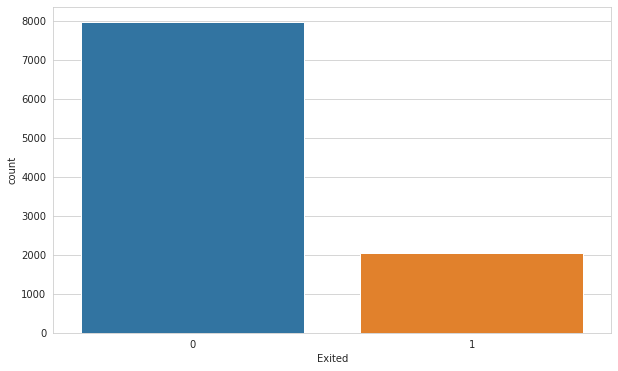

In [ ]:
sns.countplot(df.Exited);

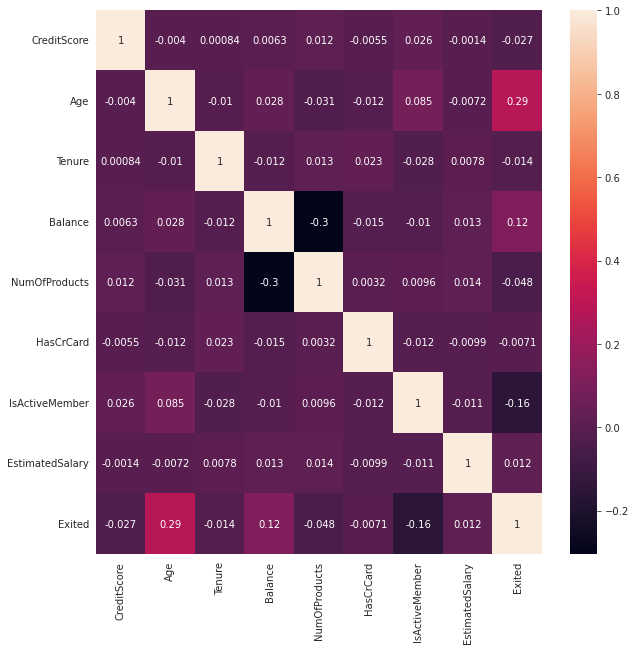

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True)
# korelasyonlar çok düşük

In [ ]:
X = df.drop("Exited", axis=1)
y = df["Exited"]

# Preprocessing of Data
- Train | Test Split, Scalling

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder, MinMaxScaler, StandardScaler
from sklearn.compose import make_column_transformer

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, stratify=y, random_state=42)

In [ ]:
cat = df.select_dtypes("object").columns
enc = OrdinalEncoder(handle_unknown="error")
scaler = MinMaxScaler()

In [ ]:
# make_column_transformer((StandardScaler(), ['numerical_column']),(OrdinalEncoder(), ['categorical_column']))

In [ ]:
column_trans = make_column_transformer((enc, cat), remainder=MinMaxScaler())

In [ ]:
X_train = column_trans.fit_transform(X_train)
X_test = column_trans.transform(X_test)

In [ ]:
# X_train= pd.DataFrame(column_trans.fit_transform(X_train), columns=features, index=X_train.index)
# X_test= pd.DataFrame(column_trans.transform(X_test), columns=features, index=X_test.index)

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import plot_roc_curve, roc_auc_score, roc_curve
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import GridSearchCV


In [ ]:
X_train.shape, X_test.shape

((8500, 10), (1500, 10))

In [ ]:
tf.random.set_seed(42)

model = Sequential()

model.add(Dense(20, activation = "relu", input_dim = X_train.shape[1]))
model.add(Dense(10, activation = "relu"))
model.add(Dense(5, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))

model.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["accuracy"])

In [ ]:
early_stop = EarlyStopping(monitor="val_loss",
                           mode="auto",
                           verbose=1,
                           patience=10,
                           restore_best_weights=True)

In [ ]:
model.fit(x = X_train, y = y_train, validation_split = 0.1, batch_size = 32, epochs = 200, verbose=1,
         callbacks=[early_stop])

Epoch 1/200
240/240 [==============================] - 3s 3ms/step - loss: 0.5448 - accuracy: 0.7749 - val_loss: 0.4908 - val_accuracy: 0.8000
Epoch 2/200
240/240 [==============================] - 0s 2ms/step - loss: 0.4794 - accuracy: 0.7959 - val_loss: 0.4751 - val_accuracy: 0.8000
Epoch 3/200
240/240 [==============================] - 1s 2ms/step - loss: 0.4586 - accuracy: 0.7970 - val_loss: 0.4633 - val_accuracy: 0.8024
Epoch 4/200
240/240 [==============================] - 1s 2ms/step - loss: 0.4394 - accuracy: 0.8108 - val_loss: 0.4555 - val_accuracy: 0.8071
Epoch 5/200
240/240 [==============================] - 1s 2ms/step - loss: 0.4297 - accuracy: 0.8148 - val_loss: 0.4500 - val_accuracy: 0.8024
Epoch 6/200
240/240 [==============================] - 1s 2ms/step - loss: 0.4230 - accuracy: 0.8156 - val_loss: 0.4449 - val_accuracy: 0.8012
Epoch 7/200
240/240 [==============================] - 0s 2ms/step - loss: 0.4172 - accuracy: 0.8166 - val_loss: 0.4390 - val_accuracy: 0.8012

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 20)                220       
                                                                 
 dense_1 (Dense)             (None, 10)                210       
                                                                 
 dense_2 (Dense)             (None, 5)                 55        
                                                                 
 dense_3 (Dense)             (None, 1)                 6         
                                                                 
Total params: 491
Trainable params: 491
Non-trainable params: 0
_________________________________________________________________


In [ ]:
loss_df = pd.DataFrame(model.history.history)
loss_df.head()

,loss,accuracy,val_loss,val_accuracy
0,0.545,0.775,0.491,0.800
1,0.479,0.796,0.475,0.800
2,0.459,0.797,0.463,0.802
3,0.439,0.811,0.455,0.807
4,0.430,0.815,0.450,0.802


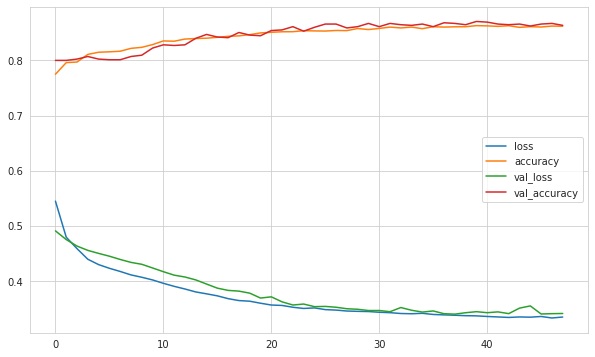

In [ ]:
loss_df.plot();

In [ ]:
model.evaluate(X_test_trans, y_test, verbose=0)

[0.352965772151947, 0.8533333539962769]

In [ ]:
loss, accuracy = model.evaluate(X_test_trans, y_test, verbose=0)
print("loss : ", loss)
print("accuracy : ", accuracy)

loss :  0.38133618235588074
accuracy :  0.8453333377838135


In [ ]:
y_pred = model.predict(X_test) > 0.5
#y_pred = model.predict_classes(X_test_trans) for tf 2.5.0
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

47/47 [==============================] - 0s 2ms/step
[[1144   50]
 [ 170  136]]
              precision    recall  f1-score   support

           0       0.87      0.96      0.91      1194
           1       0.73      0.44      0.55       306

    accuracy                           0.85      1500
   macro avg       0.80      0.70      0.73      1500
weighted avg       0.84      0.85      0.84      1500



47/47 [==============================] - 0s 1ms/step


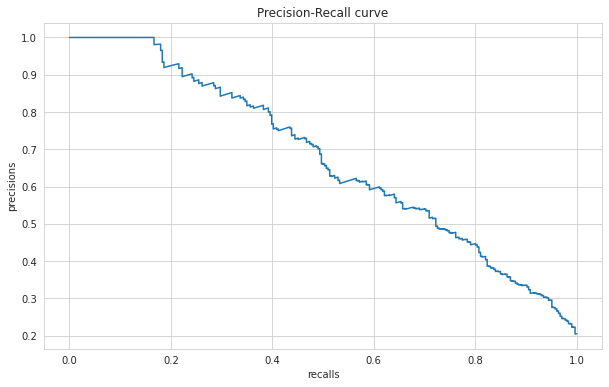

In [ ]:
y_pred_proba = model.predict(X_test)
precisions, recalls, thresholds = precision_recall_curve(y_test, y_pred_proba)
plt.plot(recalls, precisions, label='ANN')
plt.xlabel('recalls')
plt.ylabel('precisions')
plt.title('Precision-Recall curve')
plt.show()

In [ ]:
non_weighted_pre_score = average_precision_score(y_test, y_pred_proba)
non_weighted_pre_score

0.6753075992200182

In [ ]:
non_weighted_f1 = f1_score(y_test, y_pred)
non_weighted_recall = recall_score(y_test, y_pred)

## with class_weigth

Investigate how the "class_weight" hyper-parameter is used in a Neural Network.

In [ ]:
tf.random.set_seed(42)

model = Sequential()

model.add(Dense(16, activation="relu"))
model.add(Dense(8, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

opt = Adam(lr=0.001)
model.compile(optimizer=opt, 
              loss="binary_crossentropy",
              metrics=["Recall"])

In [ ]:
early_stop = EarlyStopping(monitor="val_loss",
                           mode="auto",
                           verbose=1,
                           patience=10,
                           restore_best_weights = True)

In [ ]:
from sklearn.utils import class_weight

class_weights = class_weight.compute_class_weight('balanced',
                                                  classes=np.unique(y_train),
                                                  y=y_train)

class_weights = {0: class_weights[0], 1: class_weights[1]}
class_weights

{0: 0.6278623134879598, 1: 2.455228191796649}

In [ ]:
model.fit(x=X_train,
          y=y_train,
          validation_split=.1,
          batch_size=128,
          epochs=200,
          verbose=1,
          callbacks=[early_stop],
          class_weight=class_weights)

Epoch 1/200
60/60 [==============================] - 2s 8ms/step - loss: 0.6925 - recall: 0.2012 - val_loss: 0.6769 - val_recall: 0.5118
Epoch 2/200
60/60 [==============================] - 0s 3ms/step - loss: 0.6717 - recall: 0.5484 - val_loss: 0.6605 - val_recall: 0.5235
Epoch 3/200
60/60 [==============================] - 0s 3ms/step - loss: 0.6579 - recall: 0.5926 - val_loss: 0.6482 - val_recall: 0.5529
Epoch 4/200
60/60 [==============================] - 0s 3ms/step - loss: 0.6460 - recall: 0.6240 - val_loss: 0.6611 - val_recall: 0.6176
Epoch 5/200
60/60 [==============================] - 0s 3ms/step - loss: 0.6345 - recall: 0.6342 - val_loss: 0.6648 - val_recall: 0.6353
Epoch 6/200
60/60 [==============================] - 0s 3ms/step - loss: 0.6258 - recall: 0.6586 - val_loss: 0.6722 - val_recall: 0.6647
Epoch 7/200
60/60 [==============================] - 0s 3ms/step - loss: 0.6172 - recall: 0.6605 - val_loss: 0.6429 - val_recall: 0.6118
Epoch 8/200
60/60 [======================

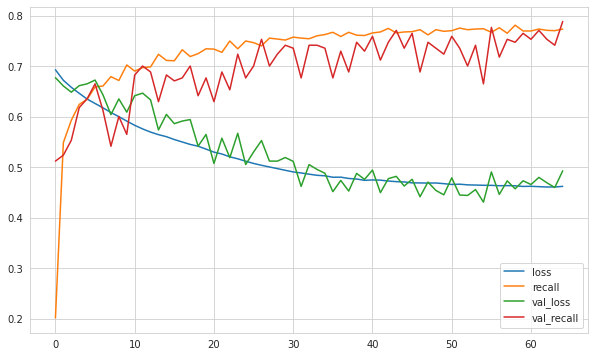

In [ ]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [ ]:
y_pred = (model.predict(X_test) > .5).astype("int32")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

47/47 [==============================] - 0s 1ms/step
[[962 232]
 [ 83 223]]
              precision    recall  f1-score   support

           0       0.92      0.81      0.86      1194
           1       0.49      0.73      0.59       306

    accuracy                           0.79      1500
   macro avg       0.71      0.77      0.72      1500
weighted avg       0.83      0.79      0.80      1500



47/47 [==============================] - 0s 2ms/step


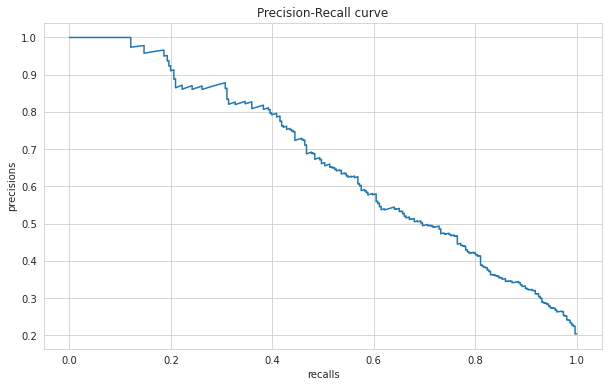

In [ ]:
y_pred_proba = model.predict(X_test)
precisions, recalls, thresholds = precision_recall_curve(y_test, y_pred_proba)
plt.plot(recalls, precisions, label='ANN')
plt.xlabel('recalls')
plt.ylabel('precisions')
plt.title('Precision-Recall curve')
plt.show()

In [ ]:
weighted_pre_score = average_precision_score(y_test, y_pred_proba)
weighted_pre_score  

0.6655066495590977

In [ ]:
weighted_f1 = f1_score(y_test, y_pred)
weighted_recall = recall_score(y_test, y_pred)

## Optune

In [ ]:
# pip install optuna

In [ ]:
import optuna
# optimizers for gradient descent to use in backpropagation
from tensorflow.keras.optimizers import Adam, Adadelta, RMSprop, Nadam  

In [ ]:
class_weights

{0: 0.6278623134879598, 1: 2.455228191796649}

In [ ]:
trial_metric = "Recall"
batch_size = 512


def create_model(trial):
    # Some hyperparameters we want to optimize
    n_units1 = trial.suggest_int('n_units1', 8, 128)
    n_units2 = trial.suggest_int('n_units2', 8, 128)
    optimizer = trial.suggest_categorical("optimizer",
                                          [Adam, Adadelta, RMSprop, Nadam])
    learning_rate = trial.suggest_loguniform('learning_rate', 1e-5, 1.3e-1)

    tf.random.set_seed(42)
    model = Sequential()
    model.add(Dense(n_units1, input_dim=X_train.shape[1], activation='relu'))
    model.add(Dense(n_units2, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy',
                  optimizer=optimizer(learning_rate=learning_rate),
                  metrics=[trial_metric])
    return model


def objective(trial):
    model = create_model(trial)
    w0 = trial.suggest_loguniform("w0", 0.01, 5)
    w1 = trial.suggest_loguniform("w1", 0.01, 5)
    model.fit(X_train,
              y_train,
              validation_split=.1,
              batch_size=batch_size,
              epochs=100,
              callbacks=[early_stop],
              class_weight={0: w0, 1: w1},
              verbose=0)
    score = model.evaluate(X_test, y_test, verbose=0)[1]
    if score > .86 : # after this threshold model gets terrible scores for class 0
        score = score * 0
    return score

In [ ]:
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=25)
study.best_params

[I 2023-01-21 15:06:58,760] A new study created in memory with name: no-name-d1220eb3-5c66-4da3-ac5c-50a87476b47f


Restoring model weights from the end of the best epoch: 1.
Epoch 11: early stopping


[I 2023-01-21 15:07:01,333] Trial 0 finished with value: 0.0 and parameters: {'n_units1': 79, 'n_units2': 45, 'optimizer': <class 'keras.optimizers.optimizer_v2.nadam.Nadam'>, 'learning_rate': 0.0002399034345272688, 'w0': 0.018560986457045837, 'w1': 2.276678601377552}. Best is trial 0 with value: 0.0.
[I 2023-01-21 15:07:12,516] Trial 1 finished with value: 0.516339898109436 and parameters: {'n_units1': 85, 'n_units2': 35, 'optimizer': <class 'keras.optimizers.optimizer_v2.adadelta.Adadelta'>, 'learning_rate': 4.870809068510932e-05, 'w0': 0.3636735442916806, 'w1': 0.04994941307692552}. Best is trial 1 with value: 0.516339898109436.


Restoring model weights from the end of the best epoch: 6.
Epoch 16: early stopping


[I 2023-01-21 15:07:14,839] Trial 2 finished with value: 0.0 and parameters: {'n_units1': 54, 'n_units2': 37, 'optimizer': <class 'keras.optimizers.optimizer_v2.adam.Adam'>, 'learning_rate': 0.0002214039953486353, 'w0': 0.17084847033610293, 'w1': 0.03794331315352857}. Best is trial 1 with value: 0.516339898109436.
[I 2023-01-21 15:07:24,642] Trial 3 finished with value: 0.0 and parameters: {'n_units1': 63, 'n_units2': 101, 'optimizer': <class 'keras.optimizers.optimizer_v2.adadelta.Adadelta'>, 'learning_rate': 8.835845646468701e-05, 'w0': 0.22863837420316913, 'w1': 0.012515479002643418}. Best is trial 1 with value: 0.516339898109436.


Restoring model weights from the end of the best epoch: 1.
Epoch 11: early stopping


[I 2023-01-21 15:07:27,417] Trial 4 finished with value: 0.8169934749603271 and parameters: {'n_units1': 88, 'n_units2': 36, 'optimizer': <class 'keras.optimizers.optimizer_v2.nadam.Nadam'>, 'learning_rate': 0.000539308144532697, 'w0': 0.47279248654425343, 'w1': 3.493604136500803}. Best is trial 4 with value: 0.8169934749603271.


Restoring model weights from the end of the best epoch: 15.
Epoch 25: early stopping


[I 2023-01-21 15:07:30,899] Trial 5 finished with value: 0.0 and parameters: {'n_units1': 102, 'n_units2': 99, 'optimizer': <class 'keras.optimizers.optimizer_v2.adam.Adam'>, 'learning_rate': 5.836510225062692e-05, 'w0': 4.034985768239888, 'w1': 0.07064583770890552}. Best is trial 4 with value: 0.8169934749603271.


Restoring model weights from the end of the best epoch: 1.
Epoch 11: early stopping


[I 2023-01-21 15:07:32,751] Trial 6 finished with value: 0.03594771400094032 and parameters: {'n_units1': 21, 'n_units2': 31, 'optimizer': <class 'keras.optimizers.optimizer_v2.adam.Adam'>, 'learning_rate': 3.802054028669228e-05, 'w0': 0.09315270544608564, 'w1': 0.47489038103526965}. Best is trial 4 with value: 0.8169934749603271.


Restoring model weights from the end of the best epoch: 24.
Epoch 34: early stopping


[I 2023-01-21 15:07:36,197] Trial 7 finished with value: 0.2777777910232544 and parameters: {'n_units1': 58, 'n_units2': 36, 'optimizer': <class 'keras.optimizers.optimizer_v2.adam.Adam'>, 'learning_rate': 0.004320203519497, 'w0': 0.05381336093050843, 'w1': 0.014507503480975443}. Best is trial 4 with value: 0.8169934749603271.
[I 2023-01-21 15:07:43,717] Trial 8 finished with value: 0.0 and parameters: {'n_units1': 18, 'n_units2': 101, 'optimizer': <class 'keras.optimizers.optimizer_v2.adadelta.Adadelta'>, 'learning_rate': 0.008874653295970668, 'w0': 0.19672860285369514, 'w1': 0.041871191441941076}. Best is trial 4 with value: 0.8169934749603271.


Restoring model weights from the end of the best epoch: 14.
Epoch 24: early stopping


[I 2023-01-21 15:07:46,931] Trial 9 finished with value: 0.04248366132378578 and parameters: {'n_units1': 72, 'n_units2': 64, 'optimizer': <class 'keras.optimizers.optimizer_v2.rmsprop.RMSprop'>, 'learning_rate': 0.008883932483363902, 'w0': 0.751287687568025, 'w1': 0.029166185152595888}. Best is trial 4 with value: 0.8169934749603271.


Restoring model weights from the end of the best epoch: 8.
Epoch 18: early stopping


[I 2023-01-21 15:07:50,904] Trial 10 finished with value: 0.0 and parameters: {'n_units1': 115, 'n_units2': 9, 'optimizer': <class 'keras.optimizers.optimizer_v2.nadam.Nadam'>, 'learning_rate': 0.10478393256835268, 'w0': 1.3399513493957325, 'w1': 4.152963516138555}. Best is trial 4 with value: 0.8169934749603271.


Restoring model weights from the end of the best epoch: 78.
Epoch 88: early stopping


[I 2023-01-21 15:07:59,867] Trial 11 finished with value: 0.0 and parameters: {'n_units1': 93, 'n_units2': 66, 'optimizer': <class 'keras.optimizers.optimizer_v2.nadam.Nadam'>, 'learning_rate': 1.3299218144593983e-05, 'w0': 0.5809187978609776, 'w1': 0.2387800910554985}. Best is trial 4 with value: 0.8169934749603271.
[I 2023-01-21 15:08:08,798] Trial 12 finished with value: 0.016339870169758797 and parameters: {'n_units1': 128, 'n_units2': 21, 'optimizer': <class 'keras.optimizers.optimizer_v2.adadelta.Adadelta'>, 'learning_rate': 0.0007922235021658522, 'w0': 0.5039828258602758, 'w1': 0.9577269189597266}. Best is trial 4 with value: 0.8169934749603271.


Restoring model weights from the end of the best epoch: 46.
Epoch 56: early stopping


[I 2023-01-21 15:08:16,569] Trial 13 finished with value: 0.0 and parameters: {'n_units1': 91, 'n_units2': 54, 'optimizer': <class 'keras.optimizers.optimizer_v2.rmsprop.RMSprop'>, 'learning_rate': 1.540690281229943e-05, 'w0': 1.894025317250677, 'w1': 0.12222078731857458}. Best is trial 4 with value: 0.8169934749603271.


Restoring model weights from the end of the best epoch: 63.
Epoch 73: early stopping


[I 2023-01-21 15:08:28,939] Trial 14 finished with value: 0.3235294222831726 and parameters: {'n_units1': 46, 'n_units2': 83, 'optimizer': <class 'keras.optimizers.optimizer_v2.nadam.Nadam'>, 'learning_rate': 0.0005505785023358835, 'w0': 0.36128356747777557, 'w1': 0.19003681120476987}. Best is trial 4 with value: 0.8169934749603271.
[I 2023-01-21 15:08:36,888] Trial 15 finished with value: 0.5588235259056091 and parameters: {'n_units1': 83, 'n_units2': 8, 'optimizer': <class 'keras.optimizers.optimizer_v2.adadelta.Adadelta'>, 'learning_rate': 0.0001834183062291366, 'w0': 1.285155614985194, 'w1': 1.2268309149354595}. Best is trial 4 with value: 0.8169934749603271.
[I 2023-01-21 15:08:48,588] Trial 16 finished with value: 0.5261437892913818 and parameters: {'n_units1': 36, 'n_units2': 8, 'optimizer': <class 'keras.optimizers.optimizer_v2.nadam.Nadam'>, 'learning_rate': 0.0018725665771275896, 'w0': 1.2488422536017918, 'w1': 1.5400438928696434}. Best is trial 4 with value: 0.81699347496032

Restoring model weights from the end of the best epoch: 41.
Epoch 51: early stopping


[I 2023-01-21 15:09:11,175] Trial 18 finished with value: 0.22549019753932953 and parameters: {'n_units1': 73, 'n_units2': 119, 'optimizer': <class 'keras.optimizers.optimizer_v2.rmsprop.RMSprop'>, 'learning_rate': 0.001652153402823607, 'w0': 4.293706251045566, 'w1': 0.7784537929090991}. Best is trial 4 with value: 0.8169934749603271.
[I 2023-01-21 15:09:20,183] Trial 19 finished with value: 0.12745098769664764 and parameters: {'n_units1': 117, 'n_units2': 22, 'optimizer': <class 'keras.optimizers.optimizer_v2.adadelta.Adadelta'>, 'learning_rate': 0.00011508779904942944, 'w0': 0.977737322900528, 'w1': 2.3211908379934254}. Best is trial 4 with value: 0.8169934749603271.


Restoring model weights from the end of the best epoch: 77.
Epoch 87: early stopping


[I 2023-01-21 15:09:31,803] Trial 20 finished with value: 0.36274510622024536 and parameters: {'n_units1': 100, 'n_units2': 49, 'optimizer': <class 'keras.optimizers.optimizer_v2.nadam.Nadam'>, 'learning_rate': 0.00043789116448783084, 'w0': 0.9151462480718473, 'w1': 0.5441393326186508}. Best is trial 4 with value: 0.8169934749603271.
[I 2023-01-21 15:09:40,507] Trial 21 finished with value: 0.4575163424015045 and parameters: {'n_units1': 35, 'n_units2': 11, 'optimizer': <class 'keras.optimizers.optimizer_v2.nadam.Nadam'>, 'learning_rate': 0.001256340640394699, 'w0': 1.3923206378553146, 'w1': 1.5173474703455918}. Best is trial 4 with value: 0.8169934749603271.


Restoring model weights from the end of the best epoch: 89.
Epoch 99: early stopping


[I 2023-01-21 15:09:52,140] Trial 22 finished with value: 0.4313725531101227 and parameters: {'n_units1': 36, 'n_units2': 8, 'optimizer': <class 'keras.optimizers.optimizer_v2.nadam.Nadam'>, 'learning_rate': 0.0018403083169049323, 'w0': 1.9523788321622846, 'w1': 1.5122225628687713}. Best is trial 4 with value: 0.8169934749603271.


Restoring model weights from the end of the best epoch: 36.
Epoch 46: early stopping


[I 2023-01-21 15:09:58,668] Trial 23 finished with value: 0.6699346303939819 and parameters: {'n_units1': 82, 'n_units2': 21, 'optimizer': <class 'keras.optimizers.optimizer_v2.nadam.Nadam'>, 'learning_rate': 0.000586152270734064, 'w0': 0.8190504158723322, 'w1': 3.142571958567859}. Best is trial 4 with value: 0.8169934749603271.


Restoring model weights from the end of the best epoch: 1.
Epoch 11: early stopping


[I 2023-01-21 15:10:02,685] Trial 24 finished with value: 0.07189542800188065 and parameters: {'n_units1': 83, 'n_units2': 26, 'optimizer': <class 'keras.optimizers.optimizer_v2.nadam.Nadam'>, 'learning_rate': 0.00015880044889858013, 'w0': 0.6489395751160116, 'w1': 2.9835695821895634}. Best is trial 4 with value: 0.8169934749603271.


{'n_units1': 88,
 'n_units2': 36,
 'optimizer': keras.optimizers.optimizer_v2.nadam.Nadam,
 'learning_rate': 0.000539308144532697,
 'w0': 0.47279248654425343,
 'w1': 3.493604136500803}

In [ ]:
unit1, unit2, optimizer, lr, w0, w1 = (study.best_params['n_units1'],
                               study.best_params['n_units2'],
                               study.best_params['optimizer'],
                               study.best_params['learning_rate'], 
                               study.best_params['w0'],
                               study.best_params['w1'] )
tf.random.set_seed(42)
model = Sequential()
model.add(Dense(unit1, activation="relu"))
model.add(Dense(unit2, activation="relu"))
model.add(Dense(1, activation="sigmoid"))
opt = optimizer(lr=lr)
model.compile(optimizer=opt, loss="binary_crossentropy", metrics=["Recall"])

# train model
model.fit(X_train,
          y_train,
          validation_split=.1,
          batch_size=512,
          epochs=100,
          callbacks=[early_stop],
          class_weight={0: w0, 1: w1},
          verbose=1)

Epoch 1/100
15/15 [==============================] - 1s 24ms/step - loss: 0.7813 - recall: 0.3069 - val_loss: 0.7267 - val_recall: 0.8294
Epoch 2/100
15/15 [==============================] - 0s 5ms/step - loss: 0.7173 - recall: 0.9430 - val_loss: 0.8420 - val_recall: 1.0000
Epoch 3/100
15/15 [==============================] - 0s 6ms/step - loss: 0.6922 - recall: 0.9994 - val_loss: 0.8765 - val_recall: 1.0000
Epoch 4/100
15/15 [==============================] - 0s 7ms/step - loss: 0.6777 - recall: 0.9968 - val_loss: 0.8647 - val_recall: 1.0000
Epoch 5/100
15/15 [==============================] - 0s 7ms/step - loss: 0.6647 - recall: 0.9814 - val_loss: 0.8570 - val_recall: 0.9941
Epoch 6/100
15/15 [==============================] - 0s 6ms/step - loss: 0.6532 - recall: 0.9693 - val_loss: 0.8581 - val_recall: 0.9765
Epoch 7/100
15/15 [==============================] - 0s 6ms/step - loss: 0.6427 - recall: 0.9520 - val_loss: 0.8521 - val_recall: 0.9529
Epoch 8/100
15/15 [=====================

In [ ]:
y_pred = (model.predict(X_test) > 0.5).astype("int32")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

47/47 [==============================] - 0s 2ms/step
[[242 952]
 [ 56 250]]
              precision    recall  f1-score   support

           0       0.81      0.20      0.32      1194
           1       0.21      0.82      0.33       306

    accuracy                           0.33      1500
   macro avg       0.51      0.51      0.33      1500
weighted avg       0.69      0.33      0.33      1500



47/47 [==============================] - 0s 3ms/step


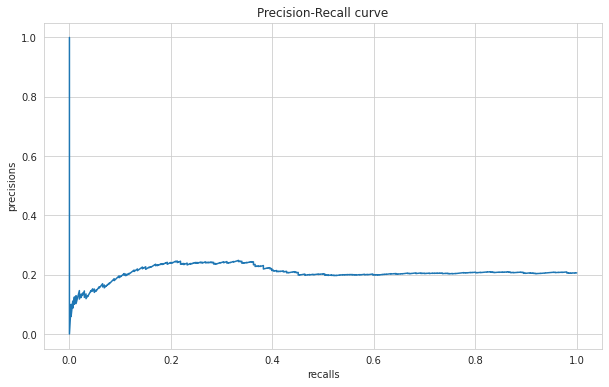

In [ ]:
y_pred_proba = model.predict(X_test)
precisions, recalls, thresholds = precision_recall_curve(y_test, y_pred_proba)
plt.plot(recalls, precisions, label='ANN')
plt.xlabel('recalls')
plt.ylabel('precisions')
plt.title('Precision-Recall curve')
plt.show()

In [ ]:
optuna_pre_score = average_precision_score(y_test, y_pred_proba)
optuna_pre_score 

0.2083201611125029

In [ ]:
optuna_weighted_f1 = f1_score(y_test, y_pred)
optuna_weighted_recall = recall_score(y_test, y_pred)

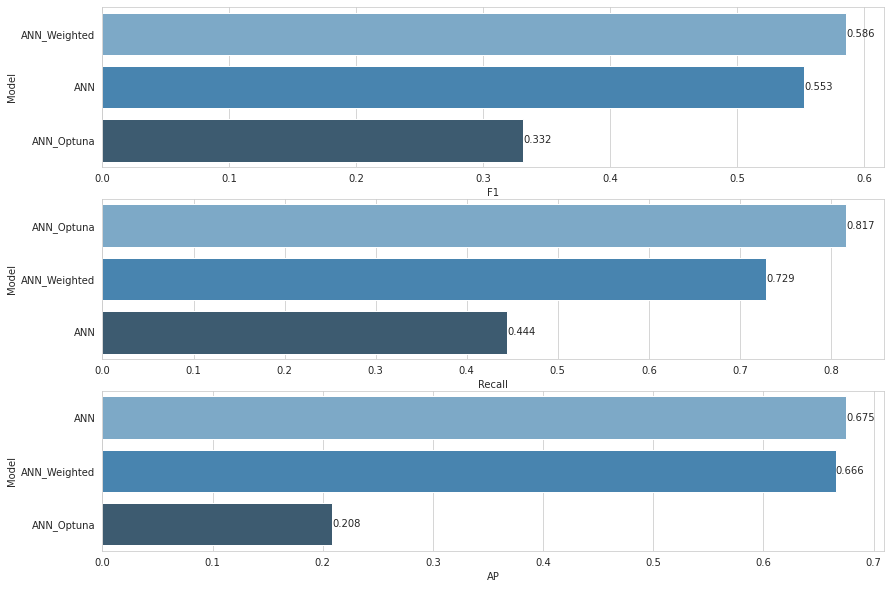

In [ ]:
compare = pd.DataFrame({
    "Model": ["ANN", "ANN_Weighted", "ANN_Optuna"],
    "F1": [non_weighted_f1, weighted_f1, optuna_weighted_f1],
    "Recall": [non_weighted_recall, weighted_recall, optuna_weighted_recall],
    "AP": [non_weighted_pre_score, weighted_pre_score, optuna_pre_score]
})


def labels(ax):
    for p in ax.patches:
        width = p.get_width()  # get bar length
        ax.text(
            width,  # set the text at 1 unit right of the bar
            p.get_y() +
            p.get_height() / 2,  # get Y coordinate + X coordinate / 2
            '{:1.3f}'.format(width),  # set variable to display, 2 decimals
            ha='left',  # horizontal alignment
            va='center')  # vertical alignment


plt.figure(figsize=(14, 10))
plt.subplot(311)
compare = compare.sort_values(by="F1", ascending=False)
ax = sns.barplot(x="F1", y="Model", data=compare, palette="Blues_d")
labels(ax)

plt.subplot(312)
compare = compare.sort_values(by="Recall", ascending=False)
ax = sns.barplot(x="Recall", y="Model", data=compare, palette="Blues_d")
labels(ax)

plt.subplot(313)
compare = compare.sort_values(by="AP", ascending=False)
ax = sns.barplot(x="AP", y="Model", data=compare, palette="Blues_d")
labels(ax)
plt.show()

# Final Model and Model Deployment

In [ ]:
import pickle # to save the model or scalling parameters

pickle.dump(column_trans, open("transformer_churn", "wb"))
pickle.dump(scaler, open("scaler_churn", 'wb')) # to save the scaler

In [ ]:
X = df.drop('Exited', axis=1)
y = df['Exited'].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    stratify=y,
                                                    test_size=0.15,
                                                    random_state=42)

In [ ]:
X_train = column_trans.fit_transform(X_train)
X_test = column_trans.transform(X_test)

In [ ]:
tf.random.set_seed(42)
model = Sequential()

model.add(Dense(88, activation="relu"))
model.add(Dense(36, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

model.compile(optimizer=Nadam(learning_rate=0.000539308144532697),
              loss="binary_crossentropy",
              metrics=["Recall"])

model.fit(x=X_train,
          y=y_train,
          validation_data=(X_test, y_test),
          callbacks=[early_stop],
          batch_size=512,
          epochs=150,
          verbose=1,
          class_weight={0:0.47279248654425343, 1:3.493604136500803})

Epoch 1/150
17/17 [==============================] - 2s 36ms/step - loss: 0.7765 - recall: 0.3362 - val_loss: 0.7453 - val_recall: 0.8725
Epoch 2/150
17/17 [==============================] - 0s 13ms/step - loss: 0.7109 - recall: 0.9676 - val_loss: 0.8568 - val_recall: 1.0000
Epoch 3/150
17/17 [==============================] - 0s 12ms/step - loss: 0.6876 - recall: 0.9988 - val_loss: 0.8707 - val_recall: 1.0000
Epoch 4/150
17/17 [==============================] - 0s 19ms/step - loss: 0.6727 - recall: 0.9948 - val_loss: 0.8416 - val_recall: 0.9804
Epoch 5/150
17/17 [==============================] - 0s 13ms/step - loss: 0.6597 - recall: 0.9723 - val_loss: 0.8313 - val_recall: 0.9608
Epoch 6/150
17/17 [==============================] - 0s 13ms/step - loss: 0.6479 - recall: 0.9544 - val_loss: 0.8420 - val_recall: 0.9575
Epoch 7/150
17/17 [==============================] - 0s 10ms/step - loss: 0.6371 - recall: 0.9411 - val_loss: 0.8200 - val_recall: 0.9281
Epoch 8/150
17/17 [===============

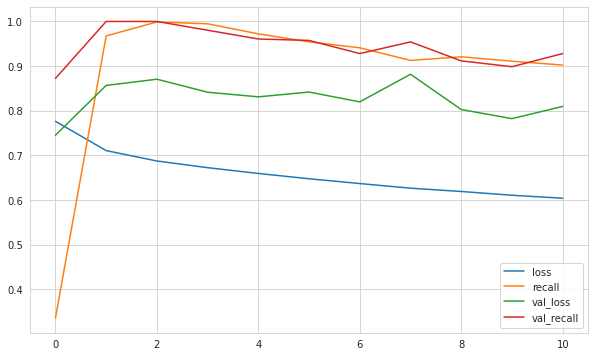

In [ ]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [ ]:
y_pred = (model.predict(X_test) > .5).astype("int32")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

47/47 [==============================] - 0s 4ms/step
[[ 192 1002]
 [  39  267]]
              precision    recall  f1-score   support

           0       0.83      0.16      0.27      1194
           1       0.21      0.87      0.34       306

    accuracy                           0.31      1500
   macro avg       0.52      0.52      0.30      1500
weighted avg       0.70      0.31      0.28      1500



In [ ]:
# model.save('model_churn.h5')

## Prediction

In [ ]:
single_customer = df.drop('Exited', axis=1).iloc[[0]]
single_customer

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.000,1,1,1,101348.880


In [ ]:
single_customer1 = single_customer.copy()
single_customer1["Geography"] = "Germany"
single_customer1["Age"] = 45
single_customer1["Balance"] = 250000

In [ ]:
single_customer1 = column_trans.transform(single_customer1)
single_customer1

array([[1.        , 0.        , 0.538     , 0.36486486, 0.2       ,
        1.04871244, 0.        , 1.        , 1.        , 0.50673489]])

In [ ]:
model.predict(single_customer1)

1/1 [==============================] - 0s 21ms/step


array([[0.5624831]], dtype=float32)

In [ ]:
(model.predict(single_customer1) > 0.5).astype("int32")

1/1 [==============================] - 0s 33ms/step


array([[1]], dtype=int32)

## Comparison with ML

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

In [ ]:
X = df.drop('Exited', axis=1)
y = df['Exited'].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    stratify=y,
                                                    test_size=0.15,
                                                    random_state=42)

In [ ]:
X_train = column_trans.fit_transform(X_train)
X_test = column_trans.transform(X_test)

In [ ]:
clf1 = RandomForestClassifier(random_state=42, class_weight="balanced")
clf2 = SVC(probability=True, random_state=42, class_weight="balanced")
clf3 = LogisticRegression(random_state=42, class_weight="balanced")

In [ ]:
# Initilaze the hyperparameters for each dictionary
param1 = {}
param1['classifier__n_estimators'] = [10, 50, 100, 250]
param1['classifier__max_depth'] = [5, 10, 20]
param1['classifier'] = [clf1]

param2 = {}
param2['classifier__C'] = [10**(-2 + i) for i in range(5)]
param2['classifier'] = [clf2]

param3 = {}
param3['classifier__C'] = [10**(-2 + i) for i in range(5)]
param3['classifier__penalty'] = ['l1', 'l2']
param3['classifier'] = [clf3]

In [ ]:
pipeline = Pipeline([('classifier', clf1)]) # pipeline to combine the classifiers
params = [param1, param2, param3] # list of dictionaries to tune the hyperparameters

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
grid_model = RandomizedSearchCV(pipeline,
                                params,
                                cv=5,
                                n_jobs=-1,
                                scoring='recall').fit(X_train, y_train)

In [ ]:
grid_model.best_params_ # best parameters to get the best score

{'classifier__C': 100,
 'classifier': SVC(C=100, class_weight='balanced', probability=True, random_state=42)}

In [ ]:
grid_model.best_score_ # best score according to the scoring function

0.7077026869450783

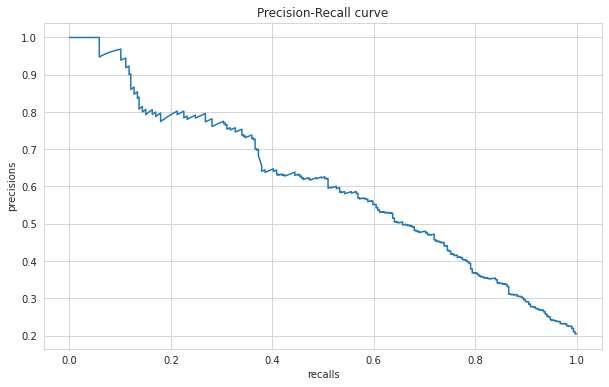

In [ ]:
y_pred_proba = grid_model.predict_proba(X_test)[:, 1]
precisions, recalls, thresholds = precision_recall_curve(y_test, y_pred_proba)
plt.plot(recalls, precisions, label='RF')
plt.xlabel('recalls')
plt.ylabel('precisions')
plt.title('Precision-Recall curve')
plt.show()

In [ ]:
average_precision_score(y_test, y_pred_proba)

0.6060413020865634

In [ ]:
y_pred = grid_model.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[939 255]
 [ 86 220]]
              precision    recall  f1-score   support

           0       0.92      0.79      0.85      1194
           1       0.46      0.72      0.56       306

    accuracy                           0.77      1500
   macro avg       0.69      0.75      0.70      1500
weighted avg       0.82      0.77      0.79      1500



___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___